In [150]:
# from pdfquery import PDFQuery
from matplotlib import pyplot as plt
import re
from bs4 import BeautifulSoup
import requests
from collections import Counter

In [151]:
#Get the Website using requests
url = "https://www.churchofjesuschrist.org/study/general-conference/2022/10/25soares?lang=eng"
response = requests.get(url)
if response.status_code == 200:
    print("Success")
    html_content    = response.content
else:
    print("Failure")




Success


In [152]:
#Get the Website using requests
topic = "family"
url = "https://www.churchofjesuschrist.org/study/general-conference/topics/{}?lang=eng".format(topic)
response = requests.get(url)
if response.status_code == 200:
    print("Success")
    html_content    = response.content
else:
    print("Failure")
# print(response.text)

#Parse the HTML
soup = BeautifulSoup(response.content, "lxml")
links = soup.find_all("a")
# print(soup.prettify())
#Change encoding
soup.encode('utf-8')
# print(soup.prettify())
fixed_links =[]
for link in links:
    href = link.get("href")
    if href is not None:
        href = "https://www.churchofjesuschrist.org" + href
        # print(href)
        fixed_links.append(href)
  

#Get article text

#get the text
# for article in article_text:


Success


In [153]:
file_folder = "/scholarly_articles"
counter_link = 0
load_links = True
scholar_links=[
    "https://go-gale-com.byu.idm.oclc.org/ps/retrieve.do?tabID=T002&resultListType=RESULT_LIST&searchResultsType=SingleTab&retrievalId=25b69e24-30ec-4088-96cf-1da6994236e0&hitCount=16370&searchType=AdvancedSearchForm&currentPosition=24&docId=GALE%7CA749396714&docType=Letter+to+the+editor&sort=Relevance&contentSegment=ZONE-MOD1&prodId=AONE&pageNum=2&contentSet=GALE%7CA749396714&searchId=R3&userGroupName=byuprovo&inPS=true"
]
for link in scholar_links:
    if not load_links:
        break
    counter_link +=1
    try:
        response = requests.get(link)
    except:
        continue
    soup = BeautifulSoup(response.content, "html.parser", from_encoding="utf-8")
    print(soup.prettify())
print(counter_link)

<!DOCTYPE html>
<html class="login-pf">
 <head>
  <meta charset="utf-8"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type">
   <meta content="noindex, nofollow" name="robots"/>
   <meta content="width=device-width,initial-scale=1" name="viewport">
    <title>
     Sign in to byu
    </title>
    <link href="/resources/wwwh8/login/keycloak/img/favicon.ico" rel="icon"/>
    <link href="/resources/wwwh8/common/keycloak/web_modules/@patternfly/react-core/dist/styles/base.css" rel="stylesheet"/>
    <link href="/resources/wwwh8/common/keycloak/web_modules/@patternfly/react-core/dist/styles/app.css" rel="stylesheet"/>
    <link href="/resources/wwwh8/common/keycloak/node_modules/patternfly/dist/css/patternfly.min.css" rel="stylesheet"/>
    <link href="/resources/wwwh8/common/keycloak/node_modules/patternfly/dist/css/patternfly-additions.min.css" rel="stylesheet"/>
    <link href="/resources/wwwh8/common/keycloak/lib/pficon/pficon.css" rel="stylesheet"/>
    <link href="/

In [154]:
#Put the links in unique files
file_folder = "/articles"
counter_link= 0
load_links = False
for link in fixed_links:
    if(load_links != True):
        break
    print(link)
    text_total = []
    counter_link += 1
    text_total = []
    try:
        response = requests.get(link)
        # print("Success: " + link)
    except:
        print("Error: " + link)
        continue
    #Parse the HTML
    soup = BeautifulSoup(response.content, "html.parser", from_encoding="utf-8")
    article_text = soup.find_all('article')
    for i in article_text:
        text_total += i.get_text()
    text_total = ''.join(text_total)
    text_total_no_a = [x.replace('â', ' ') for x in text_total]
  #remove all non standard characters
    text_total_s = [re.sub(r'[^\w\s]','',x) for x in text_total_no_a]
  # text_total_s = text_total_s.lower()
    text_total_s = "".join(text_total_s)
    text_total_s = text_total_s.lower()
    text_total_s = text_total_s.split()
    text_total_s = " ".join(text_total_s)

    #put the text in a file
    open("articles/{}article{}.txt".format(topic, counter_link), "w").write(text_total_s)

    

In [155]:
total_counter = Counter()
#get all the files in the folder
import os
file_folder = ""
files = os.listdir("./articles")
files = [x for x in files if ( x.endswith(".txt") and x.startswith(topic))]
print(files)
total_counter = Counter()
for f in files:
    temp_article = open("articles/{}".format(f), "r").read()
    temp_article_list = temp_article.split()
    total_counter += Counter(temp_article_list)
#   text_total = []
#   try:
#     response = requests.get(link)
#     print("Success: " + link)
#   except:
#     print("Error: " + link)
#     continue
#   soup = BeautifulSoup(response.content, "html.parser", from_encoding="utf-8")
#   article_text = soup.find_all('article')
#   for i in article_text:
#     text_total += i.get_text()
#   text_total = ''.join(text_total)
#   text_total_no_a = [x.replace('â', ' ') for x in text_total]
#   #remove all non standard characters
#   text_total_s = [re.sub(r'[^\w\s]','',x) for x in text_total_no_a]
#   # text_total_s = text_total_s.lower()
#   text_total_s = "".join(text_total_s)
#   text_total_s = text_total_s.lower()
#   text_total_s = text_total_s.split()
#   total_counter += Counter(text_total_s)
#   print(Counter(text_total_s))


# #replace â
# print(len(text_total))
# print(len(text_total_no_a))
# print(len(text_total_s))
print(total_counter.most_common(10))
total_counter_copy = total_counter.copy()
total_counter_value = sum(total_counter_copy.values())
print(total_counter_value)


['familyarticle25.txt', 'familyarticle65.txt', 'familyarticle195.txt', 'familyarticle134.txt', 'familyarticle224.txt', 'familyarticle359.txt', 'familyarticle333.txt', 'familyarticle331.txt', 'familyarticle180.txt', 'familyarticle216.txt', 'familyarticle288.txt', 'familyarticle318.txt', 'familyarticle412.txt', 'familyarticle348.txt', 'familyarticle264.txt', 'familyarticle337.txt', 'familyarticle205.txt', 'familyarticle261.txt', 'familyarticle259.txt', 'familyarticle150.txt', 'familyarticle392.txt', 'familyarticle31.txt', 'familyarticle8.txt', 'familyarticle229.txt', 'familyarticle232.txt', 'familyarticle182.txt', 'familyarticle113.txt', 'familyarticle139.txt', 'familyarticle236.txt', 'familyarticle36.txt', 'familyarticle70.txt', 'familyarticle341.txt', 'familyarticle296.txt', 'familyarticle54.txt', 'familyarticle353.txt', 'familyarticle223.txt', 'familyarticle112.txt', 'familyarticle52.txt', 'familyarticle1.txt', 'familyarticle115.txt', 'familyarticle191.txt', 'familyarticle38.txt', 'fa

In [156]:
print(len(fixed_links))
total_words = sum(total_counter.values())
print(total_words)


421
847744


In [157]:
# #load a pdf
# pdf = PDFQuery("/content/2022-10-2050-ulisses-soares-eng.pdf")
# pdf.load()

# # Use CSS-like selectors to locate the elements
# text_elements = pdf.pq('LTTextLineHorizontal')

# # Extract the text from the elements
# text = [t.text for t in text_elements]

# print(text)


In [158]:
#Filter Common Words
common_words = ['the', 'and',  "in", 'of', 'to', 'a', 'their', 'they', 'with', 'that', 'as' 'for', 'is', 'not', 'this', 'by', 'or', 'as', 'for', 'i', 'are', 'be', 'also']
def filter_common_words(words):
  for word in common_words:
    words[word] = 0
    # words.remove(word)


In [159]:

#Count the words
def count_words(words):
  word_count = {}
  words = words.split()
  for word in words:
    word = word.lower()
    if word in word_count:
      word_count[word] += 1
    else:
      word_count[word] = 1
  return word_count

In [160]:

gist_file = open("gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords = content.split(",")
finally:
    gist_file.close()

In [161]:
#Filter Common Words
common_words = ['the', 'and',  "in", 'of', 'to', 'a', 'their', 'they', 'with', 'that', 'as' 'for', 'is', 'not', 'this', 'by', 'or', 'as', 'for', 'i', 'are', 'be', 'also']
filtered = 0

def filter_common_words(words):
  for word in stopwords:
    words[word] = 0
  return words


In [162]:
def sort_words(words):
  words = {k: v for k, v in sorted(words.items(), key=lambda item: item[1])}
  #remove if less than 2
  for key in list(words.keys()):
    if words[key] < 3 or len(key) < 3:
      del words[key]
  return words

In [163]:
sanity_check_the = total_counter["the"]/total_words
print(total_counter)
print(sanity_check_the)

Counter({'the': 50861, 'and': 31493, 'of': 31140, 'to': 26311, 'in': 17231, 'a': 14487, 'that': 11970, 'we': 10360, 'is': 9608, 'i': 9544, 'our': 7810, 'for': 7752, 'you': 6899, 'be': 6717, 'are': 6541, 'as': 6149, 'it': 5705, 'with': 5691, 'have': 5358, 'his': 5041, 'he': 4930, 'will': 4811, 'this': 4744, 'they': 4410, 'family': 4155, 'not': 4059, 'their': 4026, 'was': 4010, 'my': 3885, 'your': 3731, 'all': 3666, 'us': 3657, 'by': 3651, 'children': 3467, 'who': 3451, 'on': 3323, 'or': 2971, 'can': 2956, 'from': 2902, 'church': 2861, 'god': 2730, 'when': 2720, 'them': 2699, 'but': 2630, 'do': 2585, 'one': 2581, 'lord': 2540, 'love': 2366, 'has': 2261, 'see': 2176, 'what': 2155, 'there': 2112, 'her': 2074, 'which': 2047, 'christ': 2018, 'father': 2003, 'at': 1978, 'so': 1971, 'home': 1971, 'an': 1966, 'life': 1929, 'jesus': 1908, 'if': 1887, 'had': 1869, 'may': 1860, 'me': 1839, 'would': 1785, 'were': 1761, 'those': 1724, 'time': 1686, 'more': 1673, 'said': 1663, 'him': 1643, 'world': 1

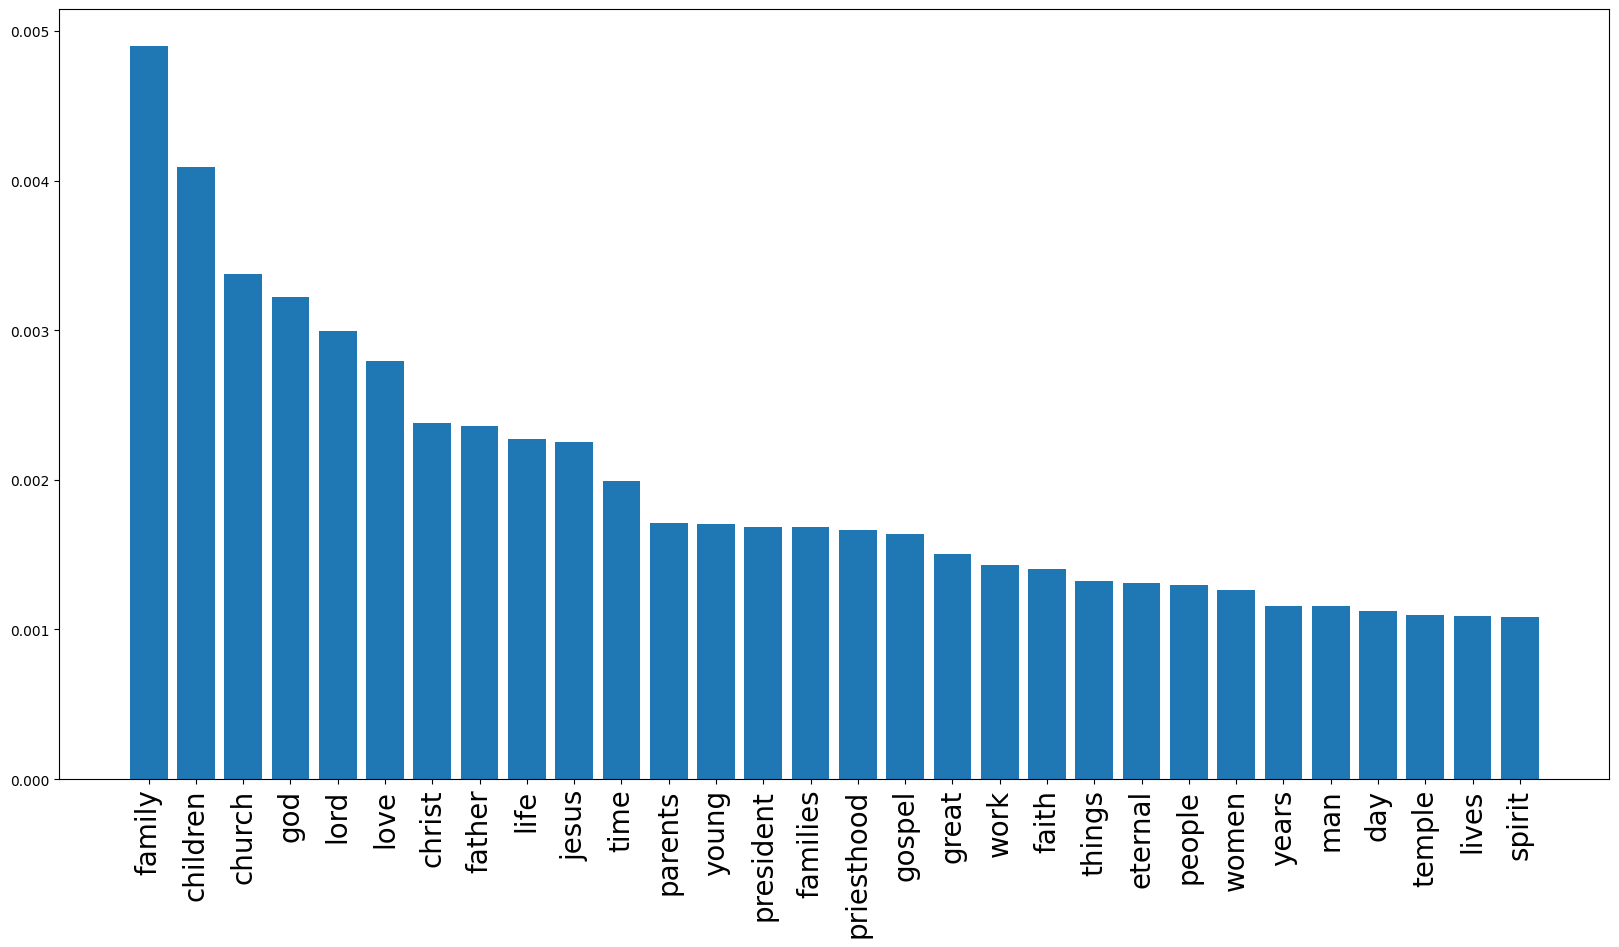

family
children
church
god
lord
love
christ
father
life
jesus
time
parents
young
president
families
priesthood
gospel
great
work
faith
things
eternal
people
women
years
man
day
temple
lives
spirit


In [164]:
if not filtered:
    word_count = filter_common_words(total_counter)
    word_count = sort_words(word_count)
    filtered = 1
most_common_words = (Counter(word_count).most_common(30))
#Convert word count to frequency
most_common_words = {k: v / total_words for k, v in most_common_words}
#Plot
plt.figure(figsize=(20,10))
plt.bar(range(len(most_common_words)), list(most_common_words.values()), align='center')
plt.xticks(range(len(most_common_words)), list(most_common_words.keys()), rotation='vertical', fontsize=20)
plt.show()
for i in (list(most_common_words.keys())):
    print(i)

In [165]:
#compare
#open the file of  unigram_freq into pandas df
import pandas as pd
df = pd.read_csv("unigram_freq.csv")
total = df['count'].sum()
print(total)
df['count'] = df['count'] / total
print(df.head(1000).to_string())
for key, value in total_counter_copy.most_common(100):
    print(key, " : " , value / total_words)

    


588124220187
              word     count
0              the  0.039338
1               of  0.022363
2              and  0.022100
3               to  0.020637
4                a  0.015441
5               in  0.014401
6              for  0.010089
7               is  0.008001
8               on  0.006377
9             that  0.005781
10              by  0.005696
11            this  0.005489
12            with  0.005412
13               i  0.005248
14             you  0.005094
15              it  0.004783
16             not  0.004478
17              or  0.004405
18              be  0.004079
19             are  0.004070
20            from  0.003869
21              at  0.003864
22              as  0.003821
23            your  0.003506
24             all  0.003439
25            have  0.002660
26             new  0.002638
27            more  0.002627
28              an  0.002582
29             was  0.002522
30              we  0.002365
31            will  0.002306
32            home  0.002171
3

400
398
family 9614483.585717835
children 9872399.3407586
church 19899293.118425615
god 14130589.281227
lord 31374836.225379385
love 6920707.761597904
christ 41783310.72850095
father 24248662.201336324
life 3700726.0008412506
jesus 32126286.249630246
time 1091197.7080048954
parents 14000601.706695259
young 6241786.969644507
president 7393147.218995531
families 17774005.58571152
priesthood 951525278.8711827
gospel 65021425.5321767
great 2489146.910564769
work 1702050.3566611279
faith 19458727.19205929
things 4467473.822463249
eternal 92658610.98556814
people 1349382.3342313422
women 2602078.6092482423
years 1709494.8688575972
man 3176500.036163801
day 1254703.9502008788
temple 34109902.43938294
lives 12711723.852947153
spirit 14618922.226284722
good 1451835.4380639142
members 2337902.2160871453
mother 9134287.050228456
men 2895708.776079164
teach 25491837.621772166
power 2089353.8648886685
sisters 46276565.51247988
taught 27682866.624415327
live 2660650.053923589
son 7450977.877293905
s

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


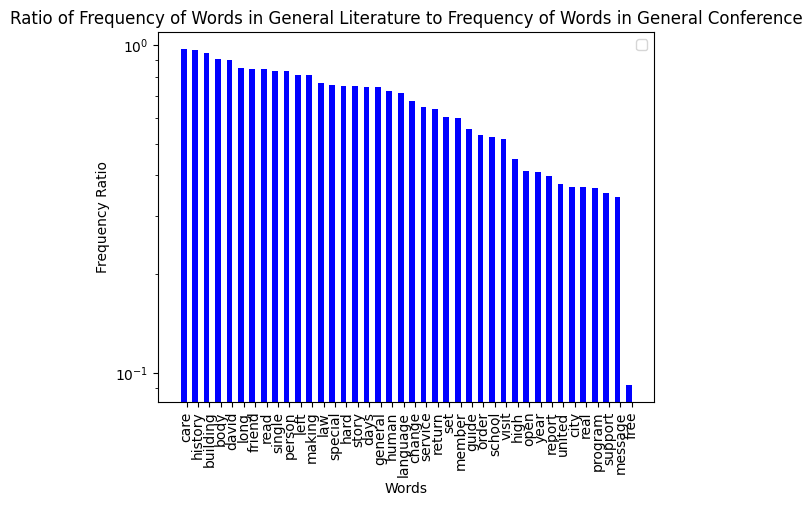

In [166]:
#Create a df mask

bar_width = .5
word_count_copy = Counter(word_count)
# word_count_total = sum(word_count_copy.values())
word_counter_total = total_counter_value
word_count_copy = word_count_copy.most_common(400)

mask = df['word'].isin(list(dict(word_count_copy).keys()))
print(len(list(dict(word_count_copy).keys())))
df_mask = df[mask]
print(len(df_mask))
word_count_copy = dict(word_count_copy)
#get the ratio of each value frequency value
ratios = []
error_count = 0
for key in word_count_copy:
    try:
        #get the float value of 'count' for a certain key in word_count
        result_iloc = df_mask[df_mask['word'] == key]['count'].iloc[0]
        
        # print("Result_iloc:", result_iloc)        
        # print("Word_count:", word_count[key])
        ratios.append([ float(word_count[key]/word_counter_total / result_iloc), key])
        print(key, word_count[key] / result_iloc)
    except Exception as e:
        # print(e)
        error_count += 1
print("Error count", error_count)

#sort ratios
ratios.sort(key=lambda x: x[0], reverse=True)

#grab only the ratios for the top 100 words from word_count
ratio_abridge = []

for l in ratios:
    #get corresponding word count
    
    # if l[1] in :
        #Fix this line
    ratio_abridge.append([l[0], 0, l[1]])
    # else:
        # print(l[1])
        # print(l[0], most_common_words[l[1]], l[1])
# print(ratio_abridge)

values_1 = [item[0] for item in ratio_abridge]
values_2 = [item[1] for item in ratio_abridge]
categories = [item[2] for item in ratio_abridge]
values_1 = values_1[-40:]
# values_2 = values_2[30:]
categories = categories[-40:]
print(len(categories))
x = range(len(categories))
fig, ax = plt.subplots()
#Plot the Ratios
rects1 = plt.bar(x, values_1, bar_width, color='blue')
plt.title("Ratio of Frequency of Words in General Literature to Frequency of Words in General Conference")
# Plot the bars for the second set of values, shifted by bar_width
# rects2 = plt.bar([i + bar_width for i in x], values_2, bar_width, label='Value 2', color='orange')

ax.set_xlabel('Words')
ax.set_ylabel('Frequency Ratio')
# ax.set_title('Bar Graph with Paired Values')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(categories)
#rotate xticks
plt.setp(ax.get_xticklabels(), rotation=90)
#uses a log scale
plt.yscale('log')
# Add a legend
ax.legend()

# Show the plot
plt.show()



In [167]:
#parse the articles in the scholarly_articles folder
list_articles = os.listdir("./scholarly_articles")
master_counter = Counter()
# list_articles = ["article8"]
for article in list_articles:
    print(article)
    article_text = open("./scholarly_articles/{}".format(article), "r").read()
    article_text = article_text.split()
    #make everything lowerdcase
    article_text = [x.lower() for x in article_text]
    #remove all non standard characters
    article_text = [re.sub(r'[^\w\s]','',x) for x in article_text]
    #remove numbers
    article_text = [re.sub(r'[0-9]','',x) for x in article_text]
    # print(article_text)
    article_counter = Counter(article_text)
    master_counter += article_counter
    print(article_counter)
    # print(article_text)
print(master_counter.most_common(10))

article16
Counter({'and': 206, 'the': 162, 'of': 144, 'a': 142, 'to': 130, 'in': 106, '': 87, 'is': 79, 'relationship': 59, 'are': 54, 'that': 51, 'with': 51, 'marriage': 50, 'their': 50, 'for': 49, 'happy': 40, 'it': 40, 'as': 37, 'also': 35, 'people': 35, 'life': 34, 'each': 32, 'important': 31, 'be': 31, 'marital': 29, 'may': 28, 'your': 27, 'they': 26, 'on': 25, 'understanding': 25, 'family': 24, 'other': 23, 'an': 23, 'problems': 23, 'married': 22, 'between': 22, 'if': 22, 'from': 20, 'love': 20, 'you': 20, 'was': 19, 'satisfaction': 19, 'spouse': 19, 'have': 19, 'not': 19, 'more': 19, 'one': 18, 'or': 18, 'can': 18, 'interviewee': 18, 'study': 17, 'trust': 17, 'person': 17, 'partners': 17, 'spouses': 17, 'children': 16, 'these': 16, 'others': 16, 'factors': 15, 'age': 15, 'status': 15, 'this': 15, 'has': 15, 'very': 15, 'differences': 14, 'inlaws': 14, 'two': 14, 'who': 14, 'them': 14, 'would': 14, 'how': 14, 'religious': 13, 'care': 13, 'education': 13, 'husbands': 13, 'but': 13

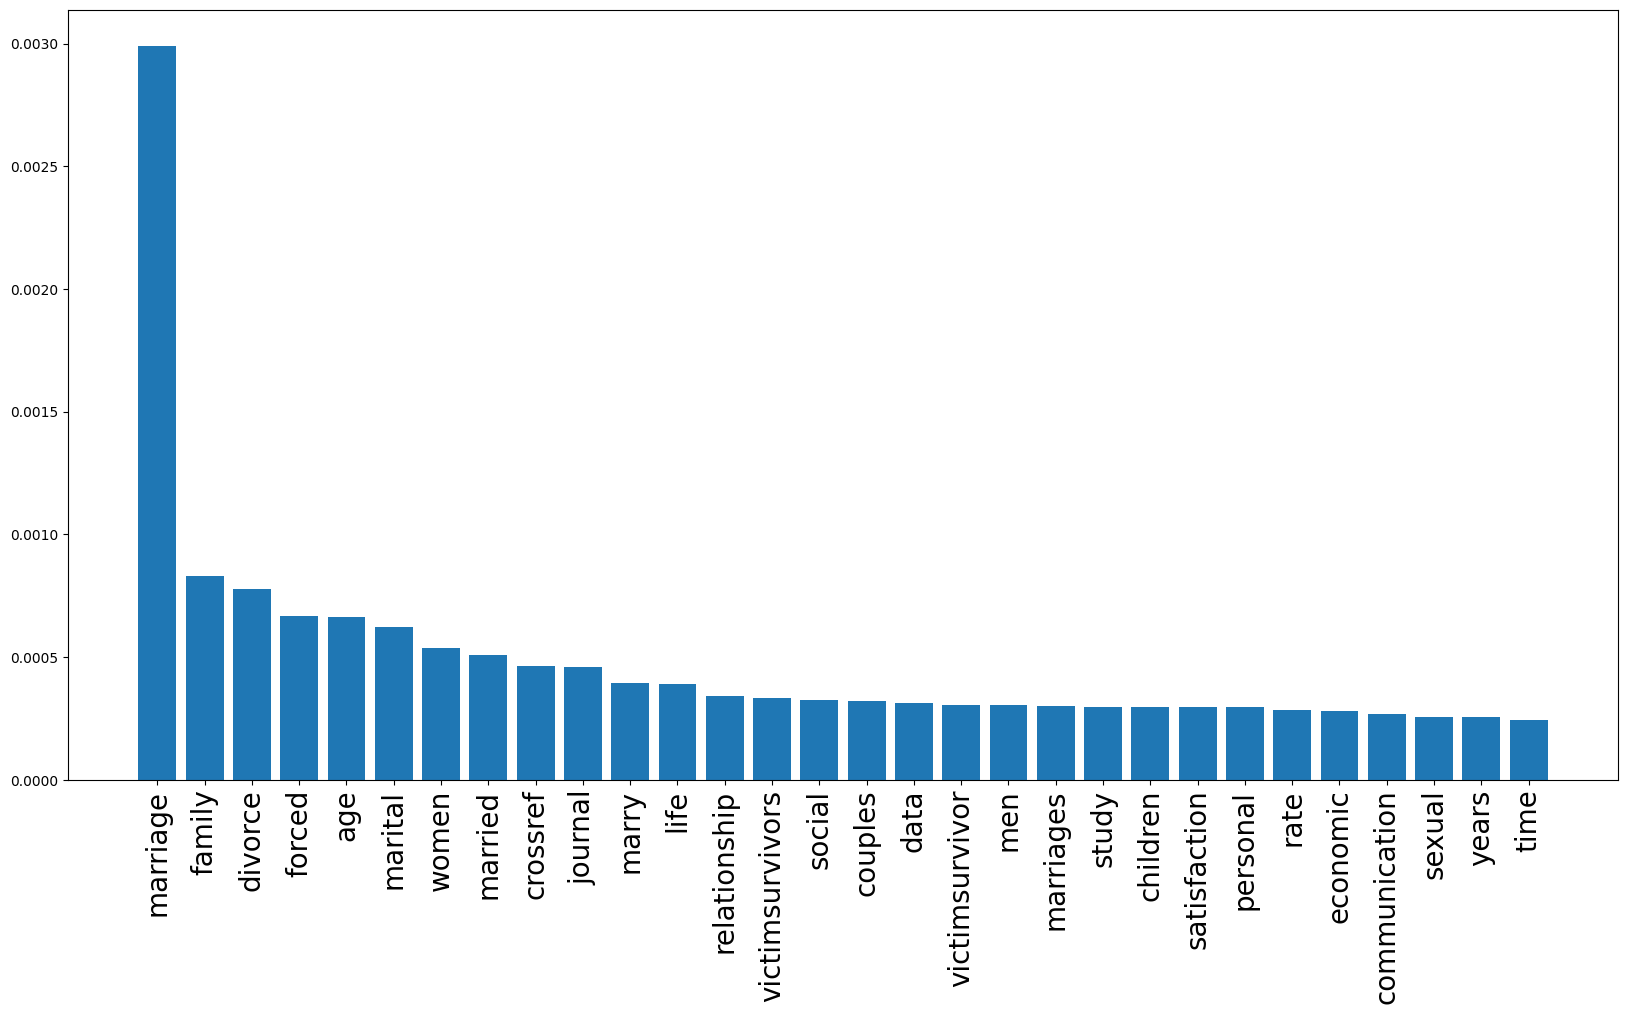

marriage
family
divorce
forced
age
marital
women
married
crossref
journal
marry
life
relationship
victimsurvivors
social
couples
data
victimsurvivor
men
marriages
study
children
satisfaction
personal
rate
economic
communication
sexual
years
time


In [168]:
filtered_scholar = 0
if not filtered_scholar:
    word_count = filter_common_words(master_counter)
    word_count = sort_words(word_count)
    filtered_scholar = 1
most_common_words = (Counter(word_count).most_common(30))
#Convert word count to frequency
most_common_words = {k: v / total_words for k, v in most_common_words}
#Plot
plt.figure(figsize=(20,10))
plt.bar(range(len(most_common_words)), list(most_common_words.values()), align='center')
plt.xticks(range(len(most_common_words)), list(most_common_words.keys()), rotation='vertical', fontsize=20)
plt.show()
for i in list(most_common_words.keys()):
    print(i)


In [169]:
# import wordcloud
# wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="white").generate(text_total)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()



In [170]:
#parse the articles in the scholarly_articles folder
list_articles = os.listdir("./scholarly_family")
family_counter = Counter()
# list_articles = ["article8"]
for article in list_articles:
    print(article)
    article_text = open("./scholarly_articles/{}".format(article), "r").read()
    article_text = article_text.split()
    #make everything lowerdcase
    article_text = [x.lower() for x in article_text]
    #remove all non standard characters
    article_text = [re.sub(r'[^\w\s]','',x) for x in article_text]
    #remove numbers
    article_text = [re.sub(r'[0-9]','',x) for x in article_text]
    # print(article_text)
    article_counter = Counter(article_text)
    family_counter += article_counter
    print(article_counter)
    # print(article_text)
print(family_counter.most_common(10))

article2
Counter({'': 480, 'the': 371, 'of': 223, 'in': 174, 'and': 171, 'a': 81, 'chronic': 70, 'to': 68, 'was': 66, 'is': 53, 'diseases': 49, 'on': 44, 'marital': 43, 'model': 43, 'between': 41, 'marriage': 41, 'fit': 41, 'were': 40, 'satisfaction': 39, 'mss': 39, 'disease': 36, 'p': 36, 'table': 35, 'study': 34, 'that': 33, 'as': 32, 'with': 31, 'index': 31, 'scores': 31, 'family': 31, 'adjustment': 30, 'analysis': 30, 'variable': 29, 'for': 28, 'effect': 25, 'individuals': 25, 'it': 25, 'mas': 25, 'or': 24, 'health': 24, 'relationship': 23, 'significant': 23, 'statistically': 21, 'by': 20, 'spouses': 19, 'be': 19, 'have': 18, 'are': 18, 'ego': 17, 'sexuality': 17, 'value': 17, 'regression': 16, 'effects': 16, 'data': 16, 'scale': 16, 'which': 15, 'this': 15, 'variables': 15, 'from': 14, 'found': 14, 'score': 14, 'betasub': 14, 'used': 13, 'structural': 13, 'studies': 13, 'their': 13, 'established': 13, 'research': 13, 'turkish': 13, 'married': 12, 'will': 12, 'equation': 12, 'model

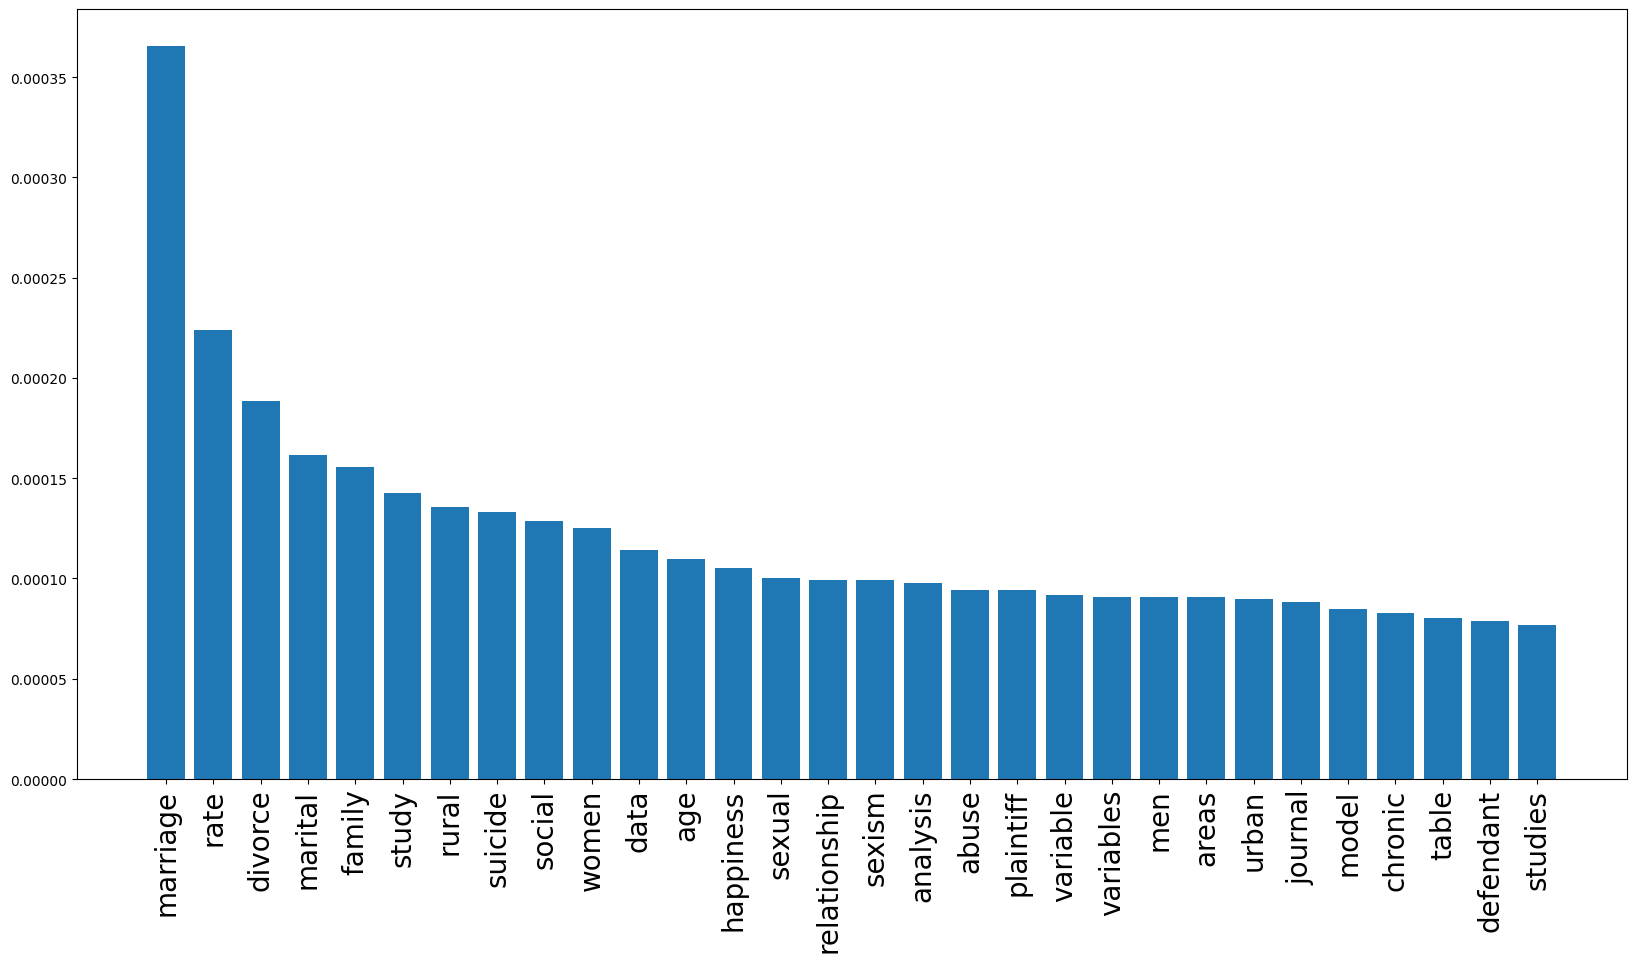

marriage
rate
divorce
marital
family
study
rural
suicide
social
women
data
age
happiness
sexual
relationship
sexism
analysis
abuse
plaintiff
variable
variables
men
areas
urban
journal
model
chronic
table
defendant
studies


In [171]:
filtered_scholar = 0
if not filtered_scholar:
    word_count = filter_common_words(family_counter)
    word_count = sort_words(word_count)
    filtered_scholar = 1
most_common_words = (Counter(word_count).most_common(30))
#Convert word count to frequency
most_common_words = {k: v / total_words for k, v in most_common_words}
#Plot
plt.figure(figsize=(20,10))
plt.bar(range(len(most_common_words)), list(most_common_words.values()), align='center')
plt.xticks(range(len(most_common_words)), list(most_common_words.keys()), rotation='vertical', fontsize=20)
plt.show()
for i in list(most_common_words.keys()):
    print(i)


Family Church vs Family Church : 60
100.0
Family Church vs Family Scholar : 6
10.0
Family Church vs Marriage Church : 50
83.33333333333334
Family Church vs Marriage Scholar : 10
16.666666666666664
Family Scholar vs Family Scholar : 60
100.0
Family Scholar vs Marriage Church : 8
13.333333333333334
Family Scholar vs Marriage Scholar : 34
56.666666666666664
Marriage Church vs Marriage Church : 60
100.0
Marriage Church vs Marriage Scholar : 12
20.0
Marriage Scholar vs Marriage Scholar : 60
100.0


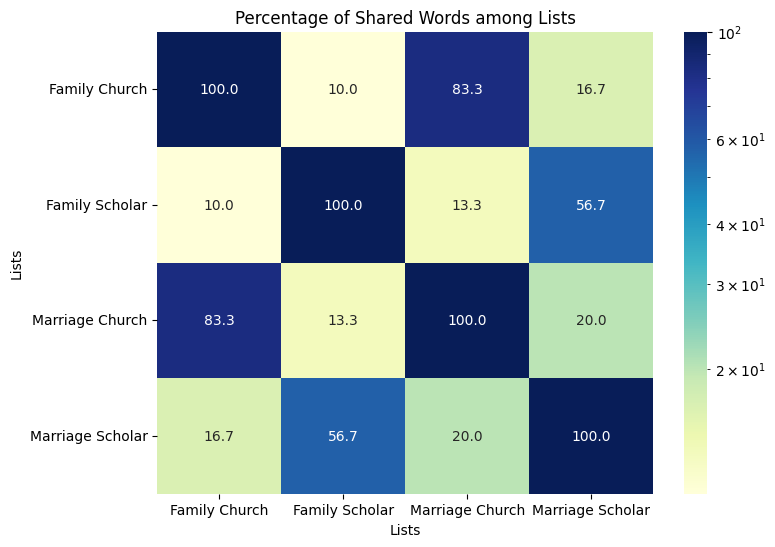

In [172]:
words_similar = 0
import matplotlib.colors as mcolors

import numpy as np

marriage_scholar = [
    "marriage", "family", "divorce", "forced", "age", "marital", "women", "married", "crossref",
    "journal", "marry", "life", "relationship", "victimsurvivors", "social", "couples", "data",
    "victimsurvivor", "men", "marriages", "study", "children", "satisfaction", "personal", "rate",
    "economic", "communication", "sexual", "years", "time", "people", "parents", "education",
    "model", "table", "risk", "analysis", "support", "relationships", "studies", "impact", "effects",
    "australia", "status", "desires", "review", "health", "child", "factors", "university", "number",
    "cases", "happiness", "rates", "abuse", "labor", "ages", "community", "persons", "rural"
]

family_scholar = [
    "marriage", "rate", "divorce", "marital", "family", "study", "rural", "suicide", "social",
    "women", "data", "age", "happiness", "sexual", "relationship", "sexism", "analysis", "abuse",
    "plaintiff", "variable", "variables", "men", "areas", "urban", "journal", "model", "chronic",
    "table", "defendant", "studies", "income", "parenting", "individuals", "health", "doi", "labor",
    "marry", "years", "diseases", "suicidal", "children", "attitudes", "married", "number",
    "university", "satisfaction", "economic", "effects", "protective", "status", "gender", "fit",
    "attitude", "china", "factors", "development", "mss", "suit", "migration", "dissolution"
]


family_church = [
    "family", "children", "church", "god", "lord", "love", "christ", "father", "life", "jesus",
    "time", "parents", "young", "president", "families", "priesthood", "gospel", "great", "work",
    "faith", "things", "eternal", "people", "women", "years", "man", "day", "temple", "lives",
    "spirit", "good", "members", "mother", "men", "teach", "power", "sisters", "taught", "live",
    "son", "society", "covenants", "heavenly", "savior", "earth", "plan", "holy", "blessings",
    "marriage", "prophet", "fathers", "joseph", "prayer", "relief", "spiritual", "homes",
    "remember", "wife", "true", "doctrine"
]

marriage_church = [
    "god", "family", "children", "marriage", "lord", "church", "love", "life", "man", "father",
    "priesthood", "eternal", "christ", "time", "young", "wife", "jesus", "men", "great",
    "president", "women", "temple", "things", "work", "people", "good", "spirit", "plan", "gospel",
    "day", "woman", "families", "parents", "years", "mother", "husband", "covenants", "holy",
    "power", "lives", "faith", "sacred", "earth", "sisters", "happiness", "son", "fathers",
    "blessings", "live", "brethren", "remember", "married", "heaven", "heart", "teach", "true",
    "divine", "savior", "speak", "doctrine"
]

# Create a set of unique words for each list
sets = [set(family_church), set(family_scholar), set(marriage_church), set(marriage_scholar)]
list_names = ['Family Church', 'Family Scholar', 'Marriage Church', 'Marriage Scholar']

# Compute the shared words among the lists
for i in range(len(sets)):
    for j in range(i , len(sets)):
        print(list_names[i], 'vs', list_names[j], ':', len(sets[i] & sets[j]))
        value = len(sets[i] & sets[j])/60 * 100
        print(value)

matrix = np.zeros((len(sets), len(sets)))

# Compute the percentage of shared words and fill the matrix
for i in range(len(sets)):
    for j in range(i, len(sets)):
        shared_word_count = len(sets[i] & sets[j])
        percentage_shared = shared_word_count / 60 * 100  # 60 is the maximum number of words in a list
        matrix[i, j] = percentage_shared
        matrix[j, i] = percentage_shared  # Fill the lower triangle of the matrix


colors = [(1, 0, 0), (0, 1, 0)]  # Red to Green
n_bins = 100  # Use 100 colors
cmap_name = 'my_custom_cmap'
cm = mcolors.LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


# Compute the percentage of shared words for each pair of lists
percent_shared = [
    [len(shared_words[i] & shared_words[j]) / len(shared_words[i]) * 100 if i != j else 100 for j in range(len(sets))]
    for i in range(len(sets))
]

# Plotting the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the heatmap plot
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt='.1f', cmap='YlGnBu',
            norm=mcolors.LogNorm(vmin=matrix.min() + 1, vmax=matrix.max()),
            xticklabels=list_names, yticklabels=list_names)
plt.title('Percentage of Shared Words among Lists')
plt.xlabel('Lists')
plt.ylabel('Lists')
plt.show()


